In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


_Data Cleaning and Preparation_

In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()
    
                           

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


_Exploring Restaurant Types_


Text(0.5, 0, 'Type of Restaurant')

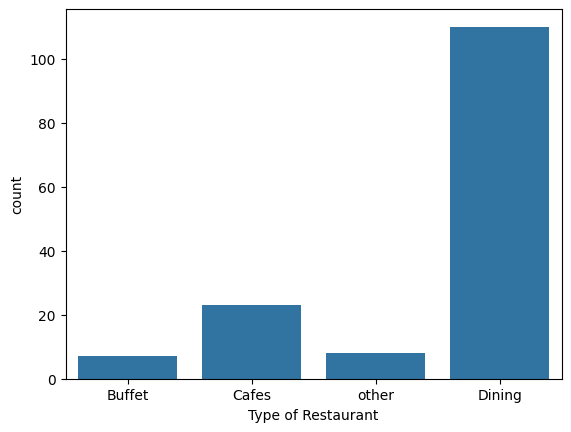

In [13]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

_Conclusion: The majority of the restaurants fall into the dining category._



Text(0, 0.5, 'Votes')

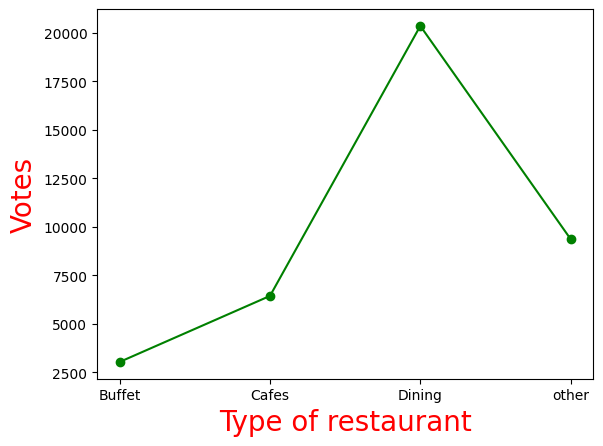

In [15]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

In [17]:
#Most voted restaurant
max_votes=df['votes'].max()
most_voted_restaurant=df.loc[df["votes"]==max_votes,"name"]
print(most_voted_restaurant)

38    Empire Restaurant
Name: name, dtype: object


Text(0.5, 0, 'online_order')

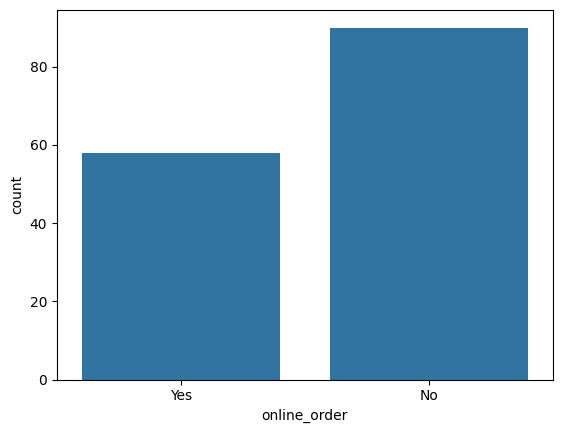

In [20]:
#online order 
sns.countplot(x=df['online_order'])
plt.xlabel("online_order")

_conclusion_Most restraunts preferr offline order._

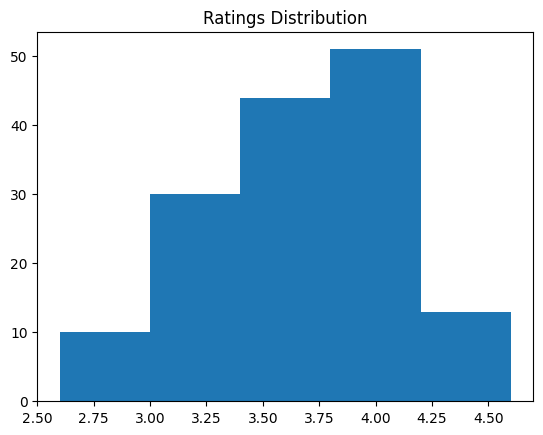

In [24]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

**Approximate cost for couples**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

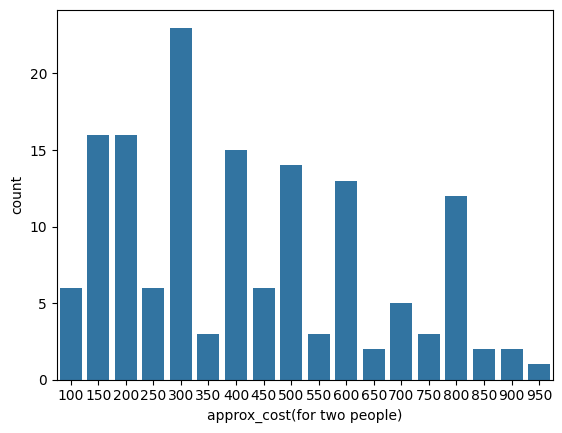

In [27]:
sns.countplot(x=df['approx_cost(for two people)'])

_Most couples orderfood cost 300_

Text(0, 0.5, 'rate')

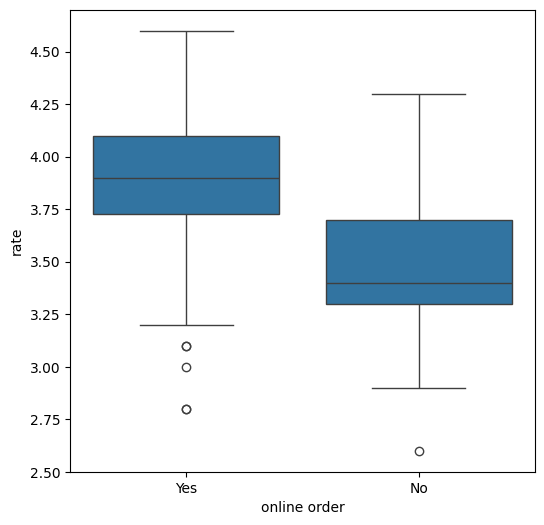

In [32]:
#comparison between online and offline orders in ratings
plt.figure(figsize=(6, 6))  
sns.boxplot(x='online_order', y='rate', data=df)  
plt.xlabel("online order")
plt.ylabel("rate")

 _Relationship between order mode (online_order) and restaurant type (listed_in(type))._

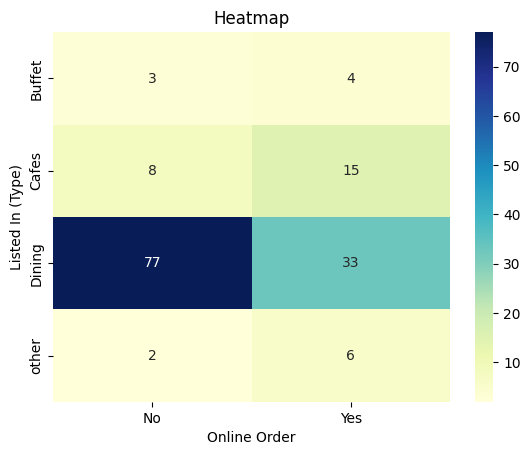

In [35]:
pivot_table = pd.pivot_table( df,index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

_Conclusion: Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes._

